In [1]:
import ROOT

In [53]:
#import a collection of smaller files to explore how change to the cuts changes the data quickly:
files = ["out/pippi0_fall2018_in_pass2/nSidis_005032.root","out/pippi0_fall2018_in_pass2/nSidis_005036.root"]
files_test = ["out/test/nSidis_005032.root","out/test/nSidis_005036.root"]
EventTree = ROOT.TChain("EventTree")
EventTree_t = ROOT.TChain("EventTree")
pippi0 = ROOT.TChain("pippi0")
pippi0_t = ROOT.TChain("pippi0")
for f in files:
    EventTree.Add(f)
    pippi0.Add(f)
for f in files_test:
    EventTree_t.Add(f)
    pippi0_t.Add(f)
    
print(f"pippi0 Tree percent increase: {(pippi0_t.GetEntries()-pippi0.GetEntries())/pippi0.GetEntries()*100}%")
print(f"Event Tree percent increase: {(EventTree_t.GetEntries()-EventTree.GetEntries())/EventTree.GetEntries()*100}%")

pippi0 Tree percent increase: 0.0%
Event Tree percent increase: 0.0%


In [54]:
[b.GetName() for b in EventTree.GetListOfBranches()]

['A',
 'evnum',
 'uID',
 'run',
 'Pol',
 'tPol',
 'hwp',
 'target',
 'tSign',
 'Nmax',
 'x',
 'y',
 'W',
 'Q2',
 'nu',
 'truex',
 'truey',
 'trueQ2',
 'trueW',
 'truenu',
 'hel',
 'truex',
 'truey',
 'trueW',
 'truenu',
 'pindex',
 'status',
 'px',
 'py',
 'pz',
 'p',
 'E',
 'pid',
 'vx',
 'vy',
 'vz',
 'chi2',
 'beta',
 'm',
 'theta',
 'eta',
 'phi',
 'truepx',
 'truepy',
 'truepz',
 'truep',
 'truept',
 'truem',
 'truetheta',
 'trueeta',
 'truephi',
 'truevx',
 'truevy',
 'truevz',
 'trueE',
 'is_CFR',
 'truepid',
 'trueparentid',
 'trueparentpid',
 'trueparentparentid',
 'trueparentparentpid',
 'pcal_sector',
 'pcal_e',
 'pcal_x',
 'pcal_y',
 'pcal_z',
 'pcal_lu',
 'pcal_lv',
 'pcal_lw',
 'pcal_m2u',
 'pcal_m2v',
 'pcal_m2w',
 'ecin_sector',
 'ecin_e',
 'ecin_x',
 'ecin_y',
 'ecin_z',
 'ecin_lu',
 'ecin_lv',
 'ecin_lw',
 'ecin_m2u',
 'ecin_m2v',
 'ecin_m2w',
 'ecout_sector',
 'ecout_e',
 'ecout_x',
 'ecout_y',
 'ecout_z',
 'ecout_lu',
 'ecout_lv',
 'ecout_lw',
 'ecout_m2u',
 'ecout_

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


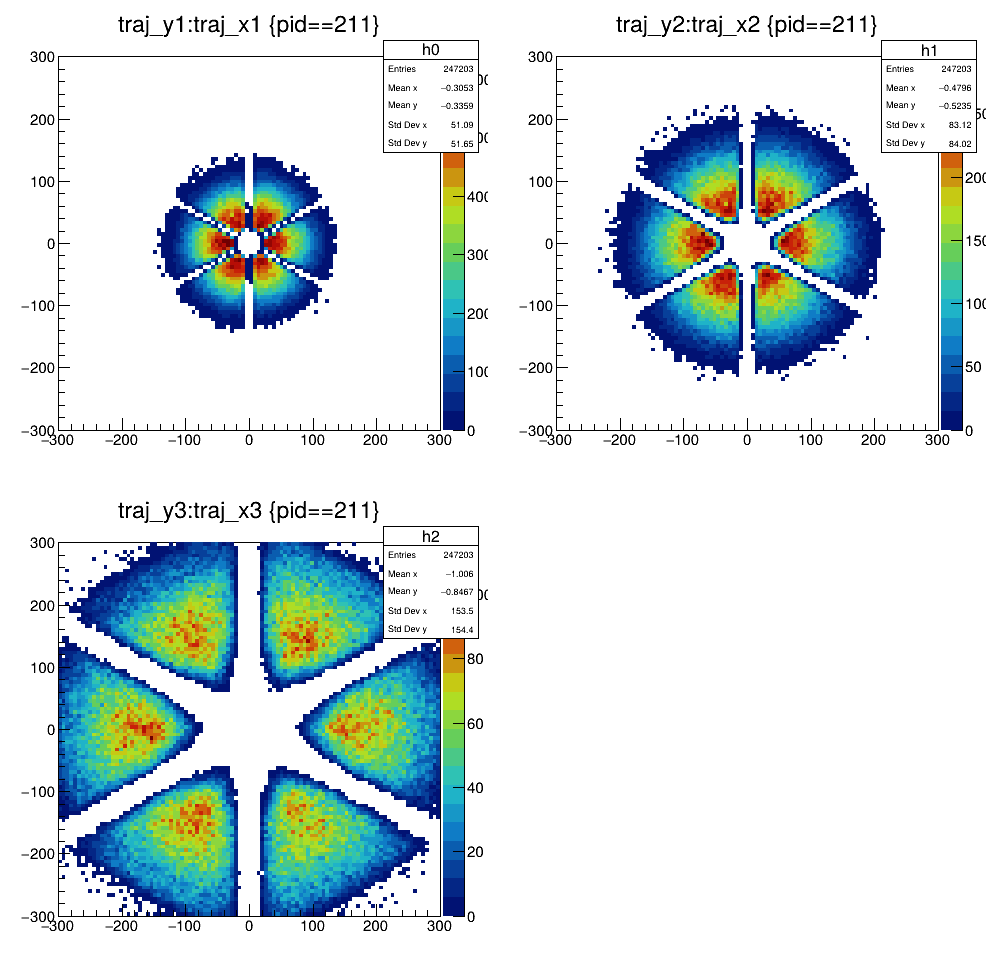

In [72]:
c = ROOT.TCanvas("c","c",1000,1000)
c.Divide(2,2)
for i in range(3):
    c.cd(i+1)
    EventTree.Draw(f"traj_y{i+1}:traj_x{i+1}>>h{i}(100,-300,300,100,-300,300)","pid==211","colz")
c.Draw()

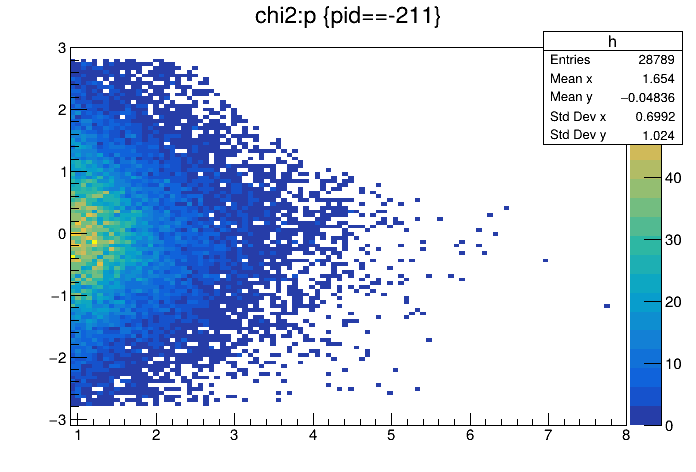

In [13]:
c = ROOT.TCanvas()
EventTree.Draw("chi2:p>>h(100,0.9,8,100,-3.1,3)","pid==-211","colz")
c.Draw()

## Monte Carlo

In [2]:
MCfiles = ["out/MC_pippi0_fall2018_in_pass2/clasdis_rga_fa18_inb_45nA_10604MeV-0001.root"]#,"out/MC_pippi0_fall2018_in_pass2/nSidis_005036.root"]
MCfiles_t = ["out/test/clasdis_rga_fa18_inb_45nA_10604MeV-0001.root"]
MCEventTree = ROOT.TChain("EventTree")
MCEventTree_t = ROOT.TChain("EventTree")
MCpippi0 = ROOT.TChain("pippi0")
MCpippi0_t = ROOT.TChain("pippi0")
for f in MCfiles:
    MCEventTree.Add(f)
    MCpippi0.Add(f)
for f in MCfiles_t:
    MCEventTree_t.Add(f)
    MCpippi0_t.Add(f)

print(f"pippi0 Tree percent increase: {(MCpippi0_t.GetEntries()-MCpippi0.GetEntries())/MCpippi0.GetEntries()*100}%")
print(f"Event Tree percent increase: {(MCEventTree_t.GetEntries()-MCEventTree.GetEntries())/MCEventTree.GetEntries()*100}%")

pippi0 Tree percent increase: 239.9906352427033%
Event Tree percent increase: 84.8087478836635%


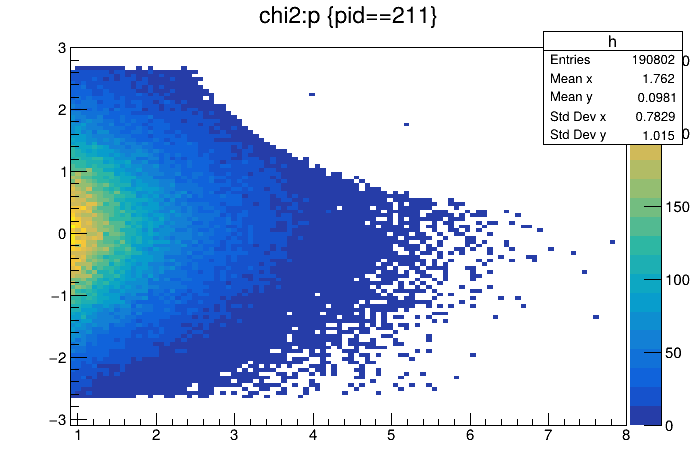

In [6]:
c = ROOT.TCanvas()
MCEventTree.Draw("chi2:p>>h(100,0.9,8,100,-3.1,3)","pid==211","colz")
c.Draw()

Warning in <TLegend::Paint>: Legend too large to be automatically placed; a default position is used


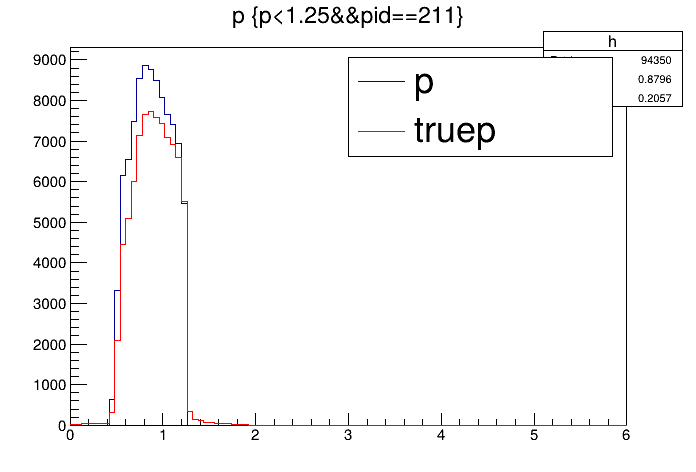

In [31]:
c = ROOT.TCanvas()
MCEventTree_t.Draw("p>>h(100,0,6)","pid==211","")
MCEventTree_t.Draw("truep>>h1(100,0,6)","pid==211","")
h = ROOT.gDirectory.Get("h")
h1 = ROOT.gDirectory.Get("h1")
h1.SetLineColor(ROOT.kRed)

leg = ROOT.TLegend(0.6,0.85,0.6,0.85)
leg.AddEntry(h,"p","l")
leg.AddEntry(h1,"truep","l")

h1.SetStats(0)
h.Draw()
h1.Draw("SAME")
leg.Draw()
c.Draw()


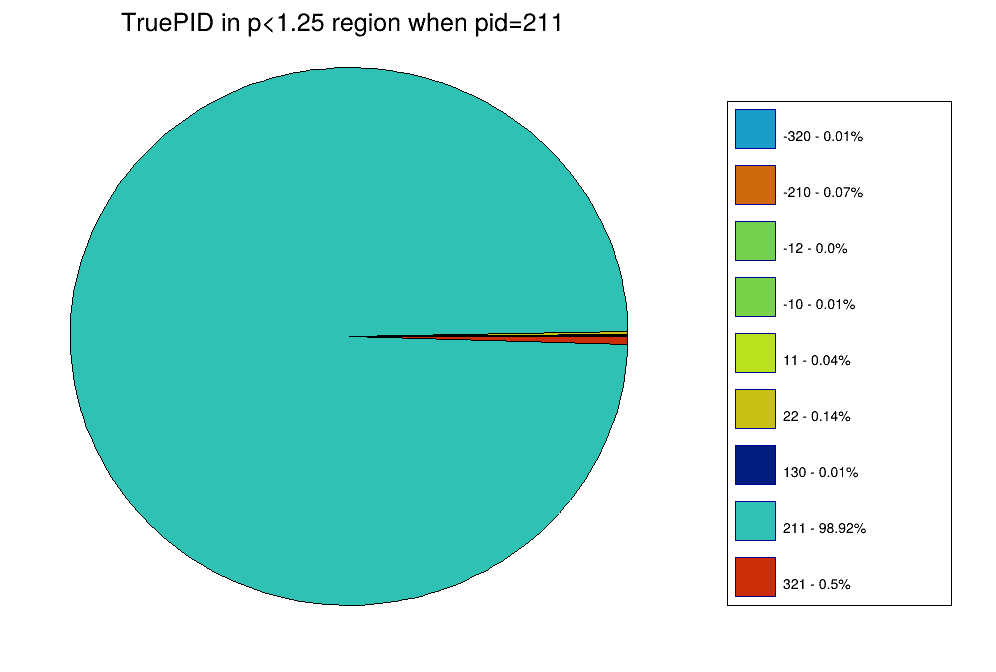

In [32]:
c = ROOT.TCanvas("c","c",1000,700)
c.Divide(2,1)
pad1 = c.cd(1)
pad1.SetPad(0.0,0.0,0.7,1.0)
pad1 = c.cd(2)
pad1.SetPad(0.7,0.0,1.0,1.0)

ROOT.gStyle.SetPalette(ROOT.kRainbow)
MCEventTree_t.Draw("truepid>>h2(800,-400,400)","p>1.25&&pid==211&&truepid!=-999","goff")
h2 = ROOT.gDirectory.Get("h2")
pie = ROOT.TPie("pie","TruePID in p<1.25 region when pid=211", h2.GetNbinsX())

dummyhists = []
leg = ROOT.TLegend(0.1,0.1,0.85,0.85)
for i in range (1, h2.GetNbinsX()+1):
    count = h2.GetBinContent(i)
    if count<1:
        continue

    pid_val = int(h2.GetBinCenter(i))
    pie.SetEntryVal(i-1,count)
    pie.SetEntryLabel(i-1,str(pid_val))
    temp = ROOT.TH1F(f"h_{i}","dummy hist",100,0,1)
    temp.SetFillColor(pie.GetEntryFillColor(i-1))
    dummyhists.append(temp)
    leg.AddEntry(temp,f"{pid_val} - {round(count/h2.GetEntries()*100,2)}%","f")

pie.SetRadius(0.4)
pie.SetLabelFormat("")
leg.SetTextSize(0.05)
c.cd(1)
pie.Draw()
c.cd(2)
leg.Draw()
c.Draw()

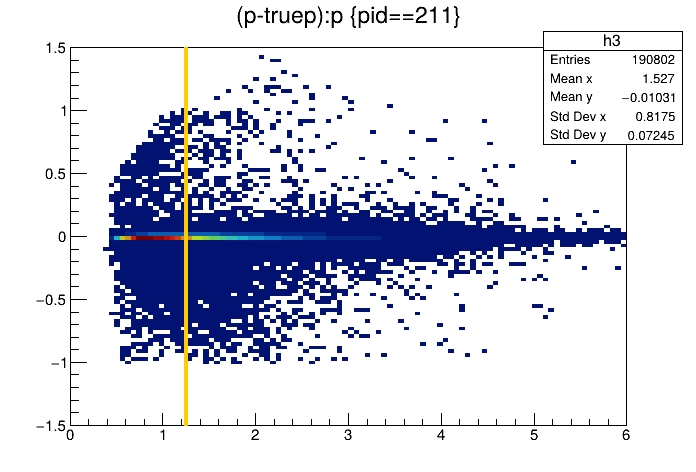

In [52]:
c = ROOT.TCanvas()
MCEventTree_t.Draw("(p-truep):p>>h3(100,0,6,100,-1.5,1.5)","pid==211","colz")
h1 = ROOT.gDirectory.Get("h3")

line = ROOT.TLine(1.25,-1.5,1.25,1.5)
line.SetLineWidth(4)
line.SetLineStyle(1)
line.SetLineColor(ROOT.kOrange)

h1.Draw()
line.Draw()

c.Draw()